price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000  

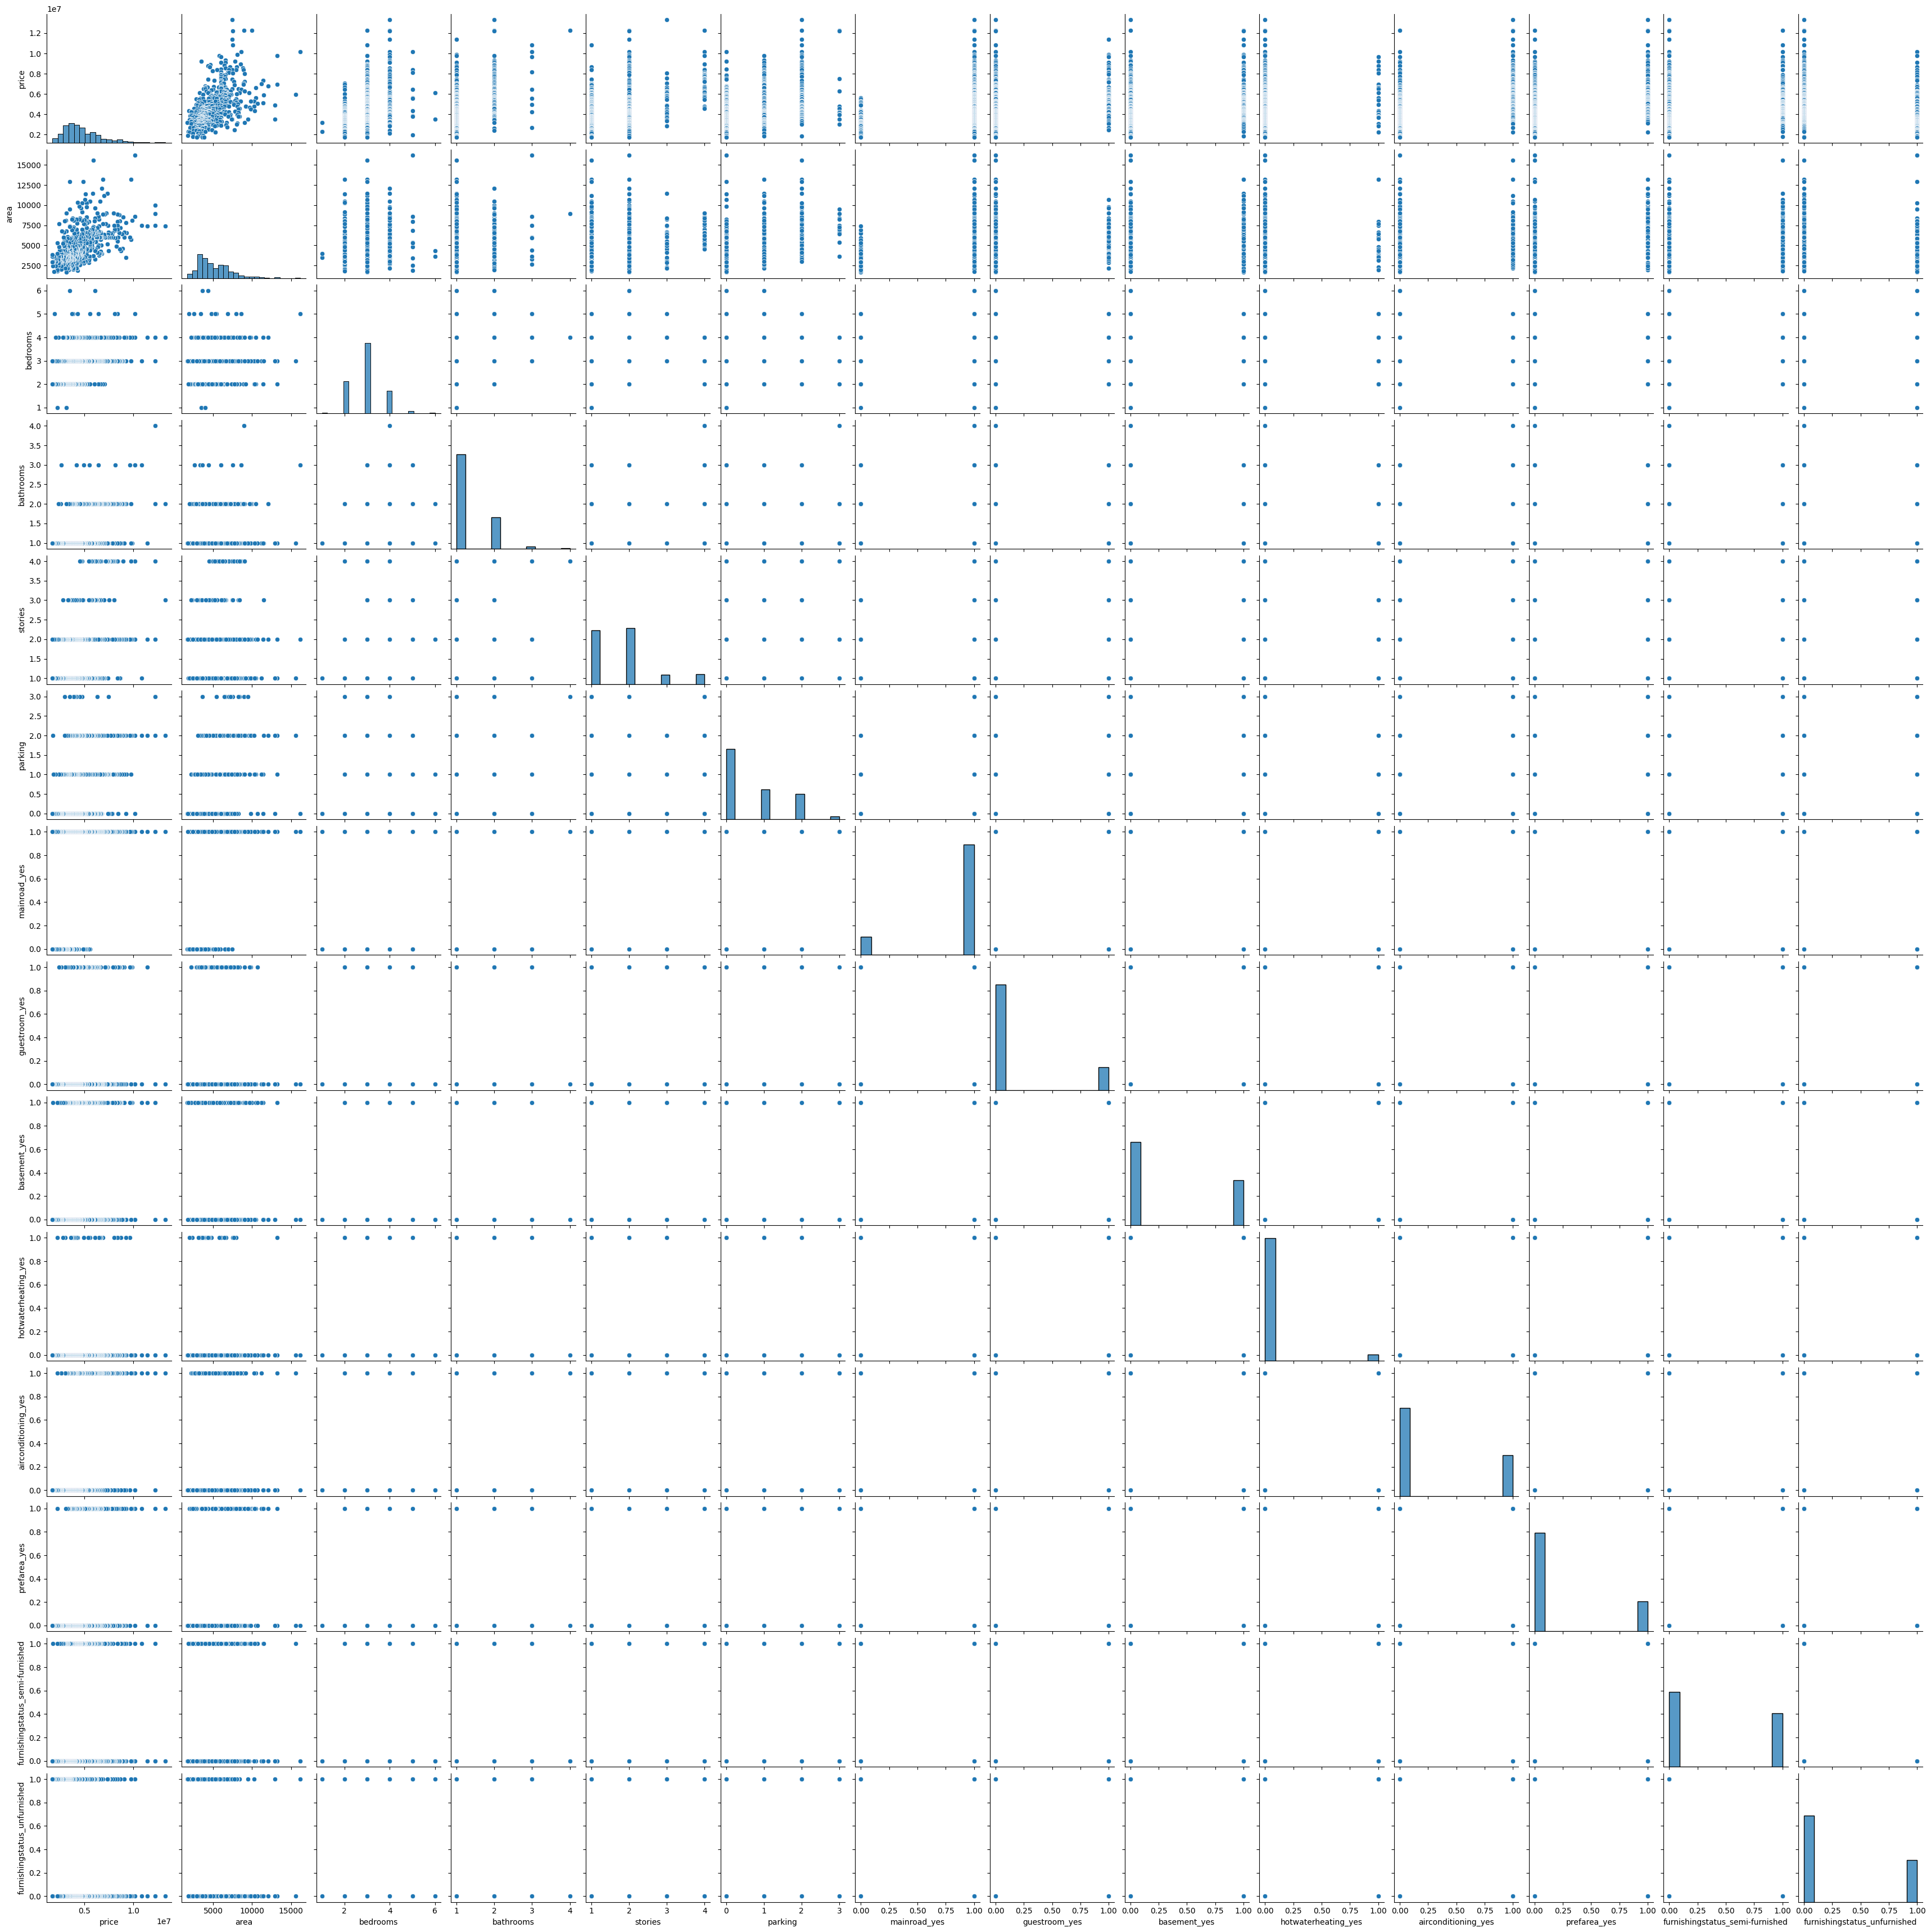

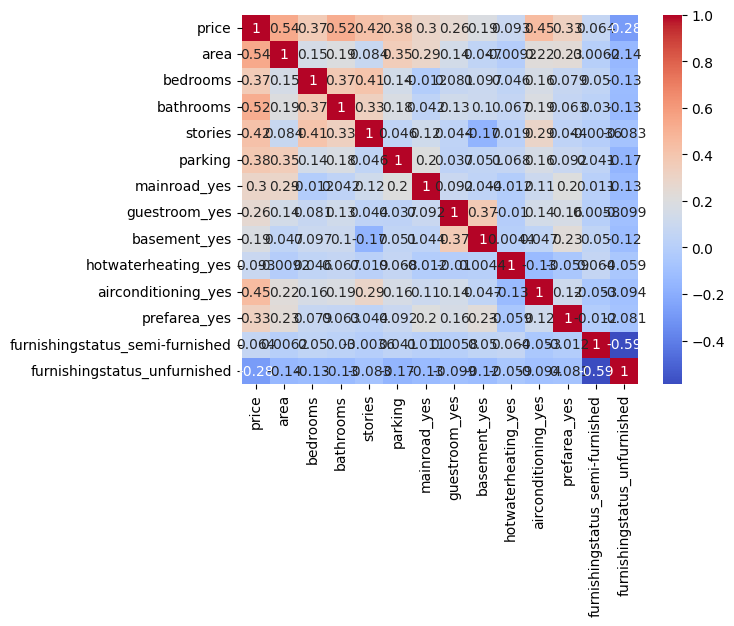

Intercept: 260032.35760741215
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


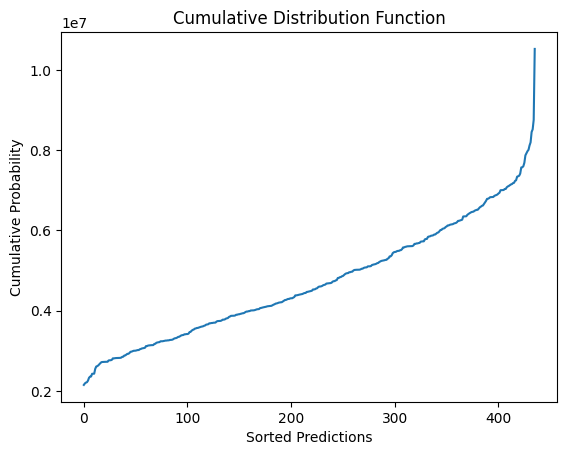

Standard Errors: area                               105.446345
bedrooms                             0.035772
bathrooms                            0.022837
stories                              0.041048
parking                              0.040897
mainroad_yes                         0.016726
guestroom_yes                        0.018355
basement_yes                         0.022957
hotwaterheating_yes                  0.010483
airconditioning_yes                  0.022097
prefarea_yes                         0.020274
furnishingstatus_semi-furnished      0.023718
furnishingstatus_unfurnished         0.022231
dtype: float64
T-statistic: area                               2.237809e+00
bedrooms                           2.146321e+06
bathrooms                          4.792489e+07
stories                            9.926825e+06
parking                            5.497726e+06
mainroad_yes                       2.199639e+07
guestroom_yes                      1.261823e+07
basement_yes         

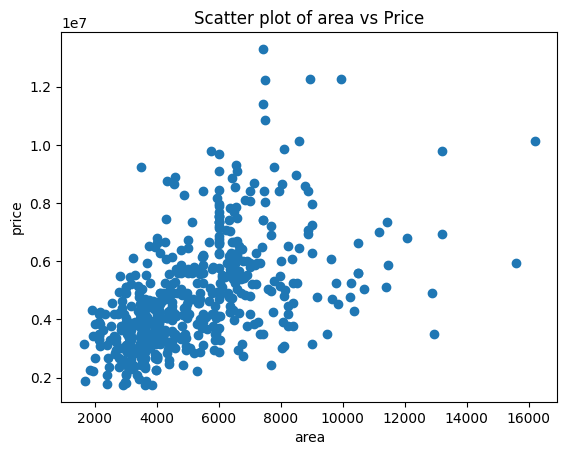

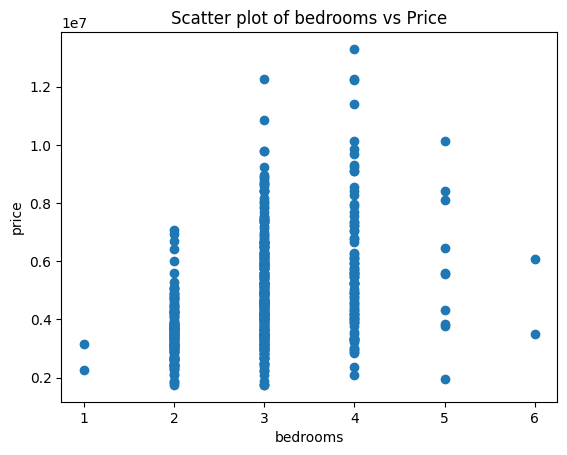

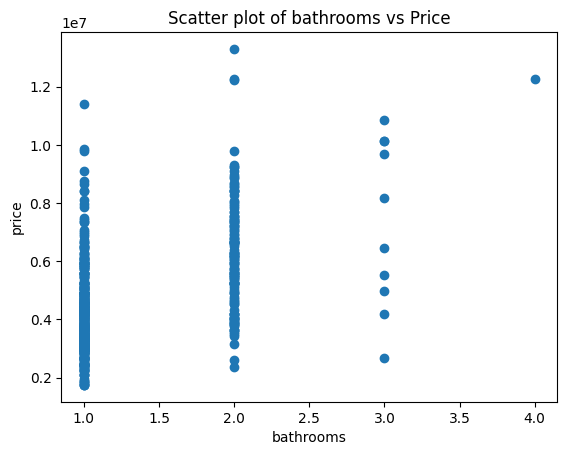

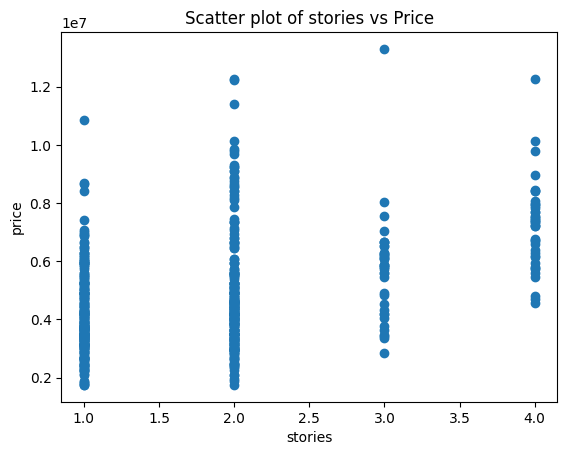

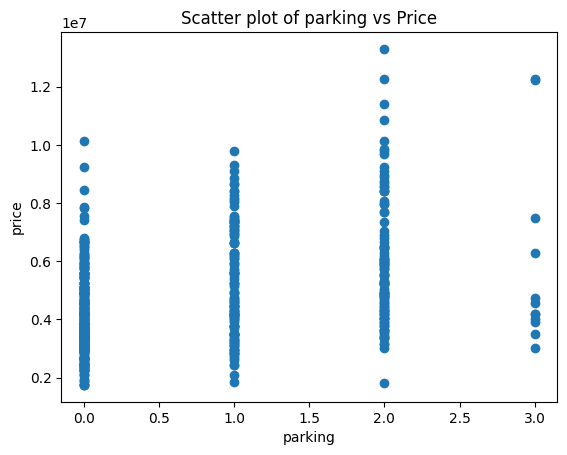

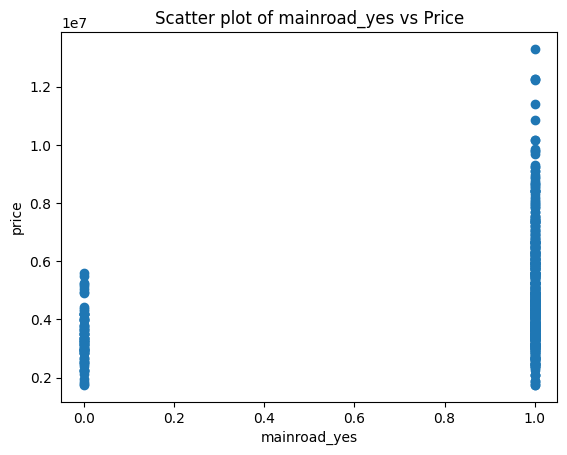

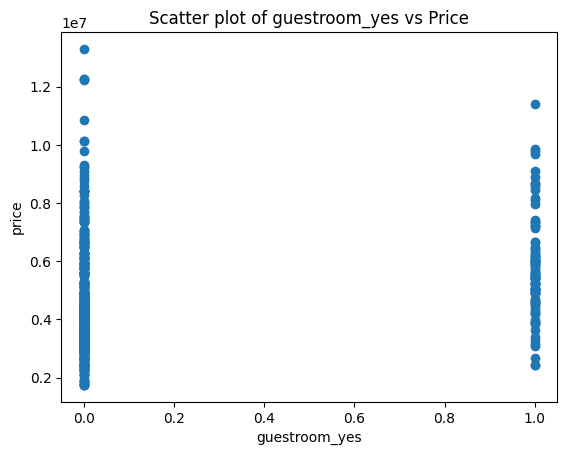

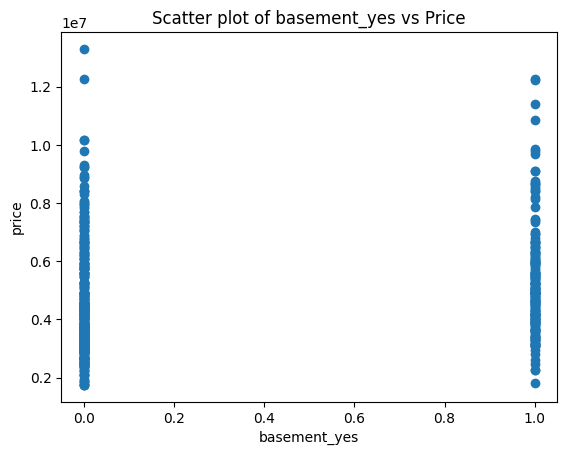

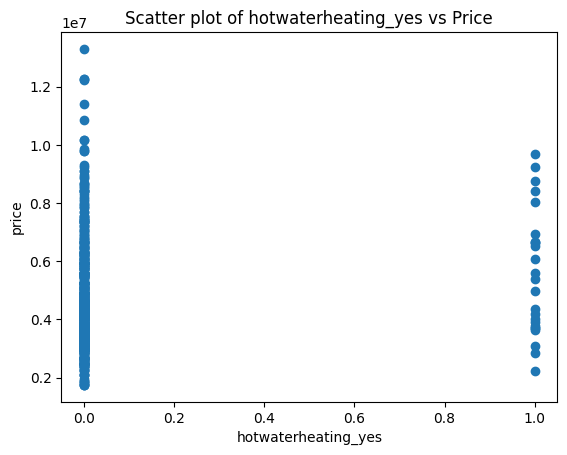

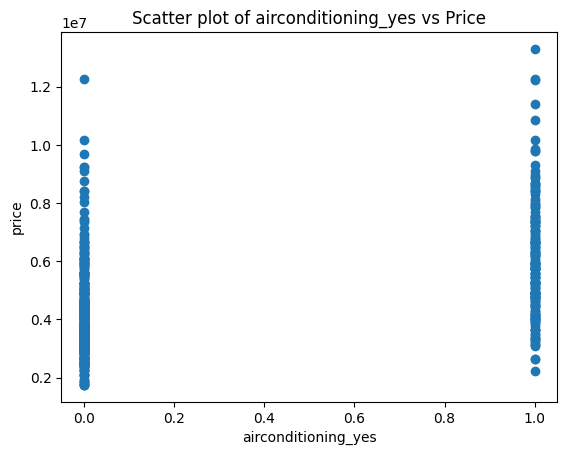

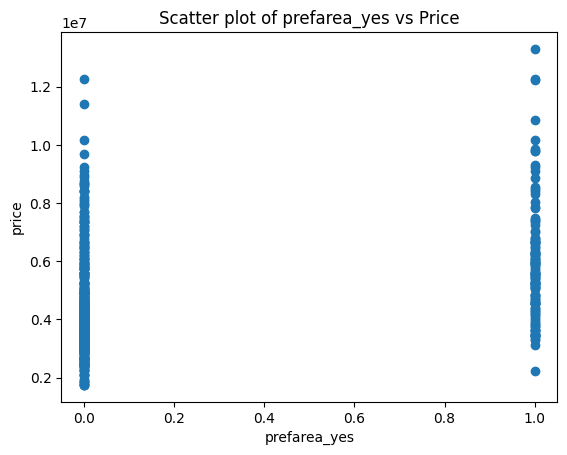

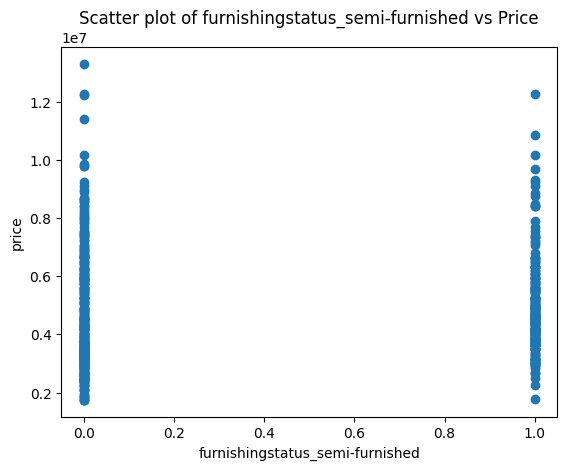

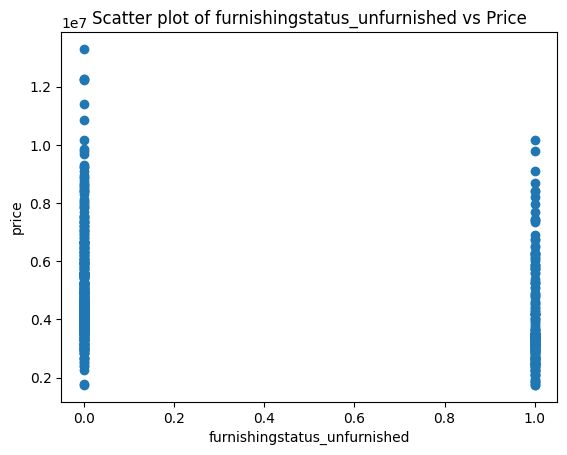

R2 Score: 0.6529242642153184


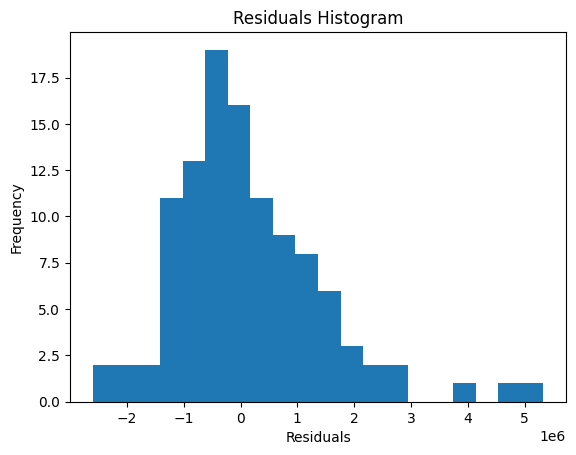

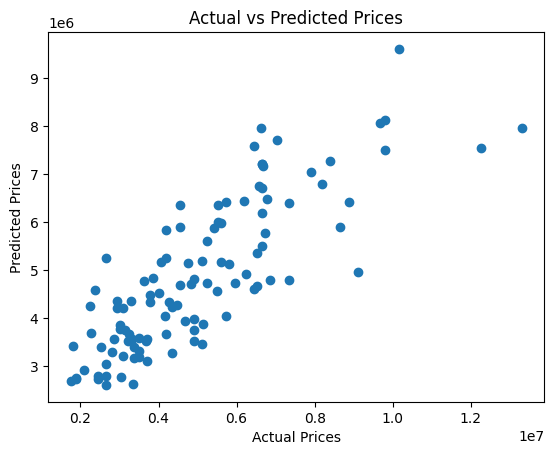

MAE: 970043.4039201636
SSE: 191220736919042.34
RMSE: 1324506.9600914386
R2 Score: 0.6529242642153184
        price      area  bedrooms  bathrooms   stories   parking  \
0    1.000000  0.396564       0.6   0.333333  0.666667  0.666667   
1    0.909091  0.502405       0.6   1.000000  1.000000  1.000000   
2    0.909091  0.571134       0.4   0.333333  0.333333  0.666667   
3    0.906061  0.402062       0.6   0.333333  0.333333  1.000000   
4    0.836364  0.396564       0.6   0.000000  0.333333  0.666667   
..        ...       ...       ...        ...       ...       ...   
540  0.006061  0.092784       0.2   0.000000  0.000000  0.666667   
541  0.001485  0.051546       0.4   0.000000  0.000000  0.000000   
542  0.000000  0.135395       0.2   0.000000  0.000000  0.000000   
543  0.000000  0.086598       0.4   0.000000  0.000000  0.000000   
544  0.000000  0.151203       0.4   0.000000  0.333333  0.000000   

     mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0          

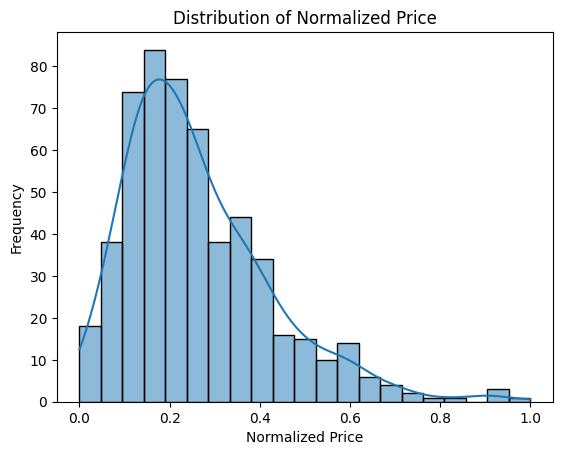

In [ ]:
  #Assignment 4
#Nimmagadda Shree Deepthi 2303A52303 Batch - 37

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats

df = pd.read_csv('Housing.csv')

df = pd.get_dummies(df, drop_first=True)

print(df.dtypes)

summary = df.describe(percentiles=[0.25, 0.5, 0.75, 0.9])
print(summary)

columns = df.columns
print(columns)

sns.pairplot(df)
plt.show()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

y_train_pred = model.predict(X_train)
cdf = np.sort(y_train_pred)
plt.plot(cdf)
plt.title('Cumulative Distribution Function')
plt.xlabel('Sorted Predictions')
plt.ylabel('Cumulative Probability')
plt.show()

standard_errors = np.std(X_train, axis=0) / np.sqrt(len(X_train))
t_statistic = coefficients / standard_errors
print(f'Standard Errors: {standard_errors}')
print(f'T-statistic: {t_statistic}')

sorted_coefficients = sorted(coefficients)
print(f'Sorted Coefficients: {sorted_coefficients}')

for feature in X.columns:
    plt.scatter(df[feature], df['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(f'Scatter plot of {feature} vs Price')
    plt.show()

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

plt.hist(y_test - y_pred, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
sse = np.sum((y_test - y_pred) ** 2)

print(f'MAE: {mae}')
print(f'SSE: {sse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

def compute_minmax(feature):
    L_min = feature.min()
    L_max = feature.max()
    L_minmax = (feature - L_min) / (L_max - L_min)
    return L_minmax

normalized_df = df.copy()
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    normalized_df[col] = compute_minmax(df[col])

print(normalized_df)

sns.histplot(normalized_df['price'], kde=True)
plt.title('Distribution of Normalized Price')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.show()

